In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [6]:
df1 = pd.read_csv('ab_data.csv')
df2 = pd.read_csv('countries.csv')

In [7]:
df1.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [8]:
df2.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [9]:
print(f'df1 shape: {df1.shape}\n'
      f'df2 shape: {df2.shape}')

df1 shape: (294480, 5)
df2 shape: (290586, 2)


In [10]:
df = pd.merge(df1, df2, how='left')

In [11]:
df

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
...,...,...,...,...,...,...
294477,697314,20:29.0,control,old_page,0,US
294478,715931,40:24.5,treatment,new_page,0,UK
294479,759899,20:29.0,treatment,new_page,0,US
294480,759899,20:29.0,treatment,new_page,0,US


In [12]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
country         0
dtype: int64

In [13]:
df.duplicated().sum()

2

In [14]:
df.groupby(['group', 'landing_page']).agg({'user_id': 'nunique'})

user_id
group     landing_page         
control   new_page         1928
          old_page       145274
treatment new_page       145311
          old_page         1965

In [16]:
df[['group', 'landing_page', 'country']] = df[['group', 'landing_page', 'country']].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294482 entries, 0 to 294481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   user_id       294482 non-null  int64   
 1   timestamp     294482 non-null  object  
 2   group         294482 non-null  category
 3   landing_page  294482 non-null  category
 4   converted     294482 non-null  int64   
 5   country       294482 non-null  category
dtypes: category(3), int64(2), object(1)
memory usage: 9.8+ MB


In [18]:
ab = df[(df["group"]=="treatment")&(df["landing_page"]=="new_page")
                |(df["group"]=="control")&(df["landing_page"]=="old_page")]

In [19]:
ab.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [20]:
ab[ab['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted,country
2893,773192,55:59.6,treatment,new_page,0,US
250002,759899,07:36.1,treatment,new_page,0,US
294479,759899,20:29.0,treatment,new_page,0,US
294480,759899,20:29.0,treatment,new_page,0,US


In [21]:
ab[ab['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted,country
1899,773192,37:58.8,treatment,new_page,0,US
2893,773192,55:59.6,treatment,new_page,0,US


In [22]:
ab.drop_duplicates(subset='user_id',inplace=True) 

/var/folders/fg/cqky7zt5763738spc5v523xw0000gn/T/ipykernel_30946/1660238305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab.drop_duplicates(subset='user_id',inplace=True)


In [23]:
ab

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
...,...,...,...,...,...,...
294475,945152,51:57.1,control,old_page,0,US
294476,734608,45:03.4,control,old_page,0,US
294477,697314,20:29.0,control,old_page,0,US
294478,715931,40:24.5,treatment,new_page,0,UK


H0: there is no difference in mean between groups by group and countries 

H1: there is difference in mean between groups by group and countries

In [63]:
ab.groupby(['landing_page', 'converted']).agg({'converted': 'count'})

converted
landing_page converted           
new_page     0             128047
             1              17264
old_page     0             127785
             1              17489

In [86]:
ab_info = [[17264, 17489], [128047, 127785]]

In [87]:
stat, p, dof, expected = stats.chi2_contingency(ab_info)
prob = 0.95
alpha = 0.05

In [88]:
print(f' p_value: {p}\n degree of free: {dof}\n stat: {stat}\n')
if p <= alpha:
    print(' Accept Null H0')
else:
    print(' Reject Null H0')

 p_value: 0.19158976298516003
 degree of free: 1
 stat: 1.7053502645115002

 Reject Null H0


In [101]:
odd_ratio, p_value = stats.fisher_exact(ab_info)
print(" p_value is : " + str(p_value))
if p_value <= alpha:
    print(' Accept Null H0')
else:
    print(' Reject Null H0')

 p_value is : 0.19047607131914915
 Reject Null H0


In [102]:
ab.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [139]:
ab_graphe = ab.groupby(['country', 'landing_page', 'group']).agg({'user_id': 'nunique'})
ab_graphe

user_id
country landing_page group             
CA      new_page     control          0
                     treatment     7301
        old_page     control       7198
                     treatment        0
UK      new_page     control          0
                     treatment    36106
        old_page     control      36360
                     treatment        0
US      new_page     control          0
                     treatment   101904
        old_page     control     101716
                     treatment        0

In [144]:
ab_graphe = pd.crosstab([ab.country,ab.group],ab.converted,margins=True).style.background_gradient(cmap='summer_r')

In [145]:
ab_graphe

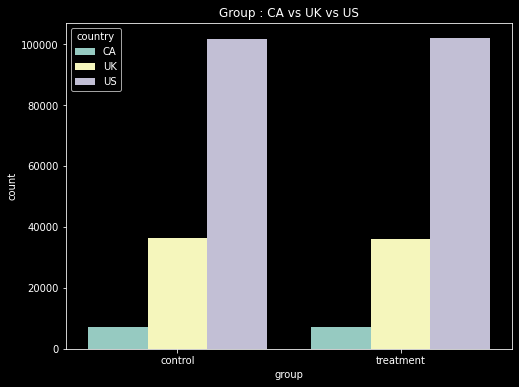

In [148]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data=ab,x="group", hue="country")

plt.title(f"Group : CA vs UK vs US")
plt.show()

As a result, there are no differences between versions of sites, we confirmed this with several statistical tests. I would leave the old version of the site